In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.tigray_utils as tu

In [3]:
def plot_confusion_matrix(df : pd.DataFrame) -> None:
    mtrx = confusion_matrix(df.actual, df.prediction)
    _, ax = plt.subplots(figsize = (6, 4))
    sns.heatmap(mtrx, cmap = "crest", annot = True, fmt = "d", cbar = False, square = True, ax = ax)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_coords(0.50, 1.10)
    ax.set_xlabel("Predicted", fontsize = 12)
    ax.set_ylabel("Actual", fontsize = 12)
    plt.tight_layout()
    print("False Positive Rate {:.4f} - True Positive Rate {:.4f}".format(mtrx[0,1] / mtrx[0,:].sum(), mtrx[1,1] / mtrx[1,:].sum()))

In [4]:
# Ground truth dataset from Ghent University
gdf = tu.load_gdf("../data/datasets/EthiopiaTigrayGhent2021.csv")
# Load crop map
map_array, map_meta = tu.load_map("tigray-2021-default.tif")

#### 1. Ground Truth Dataset

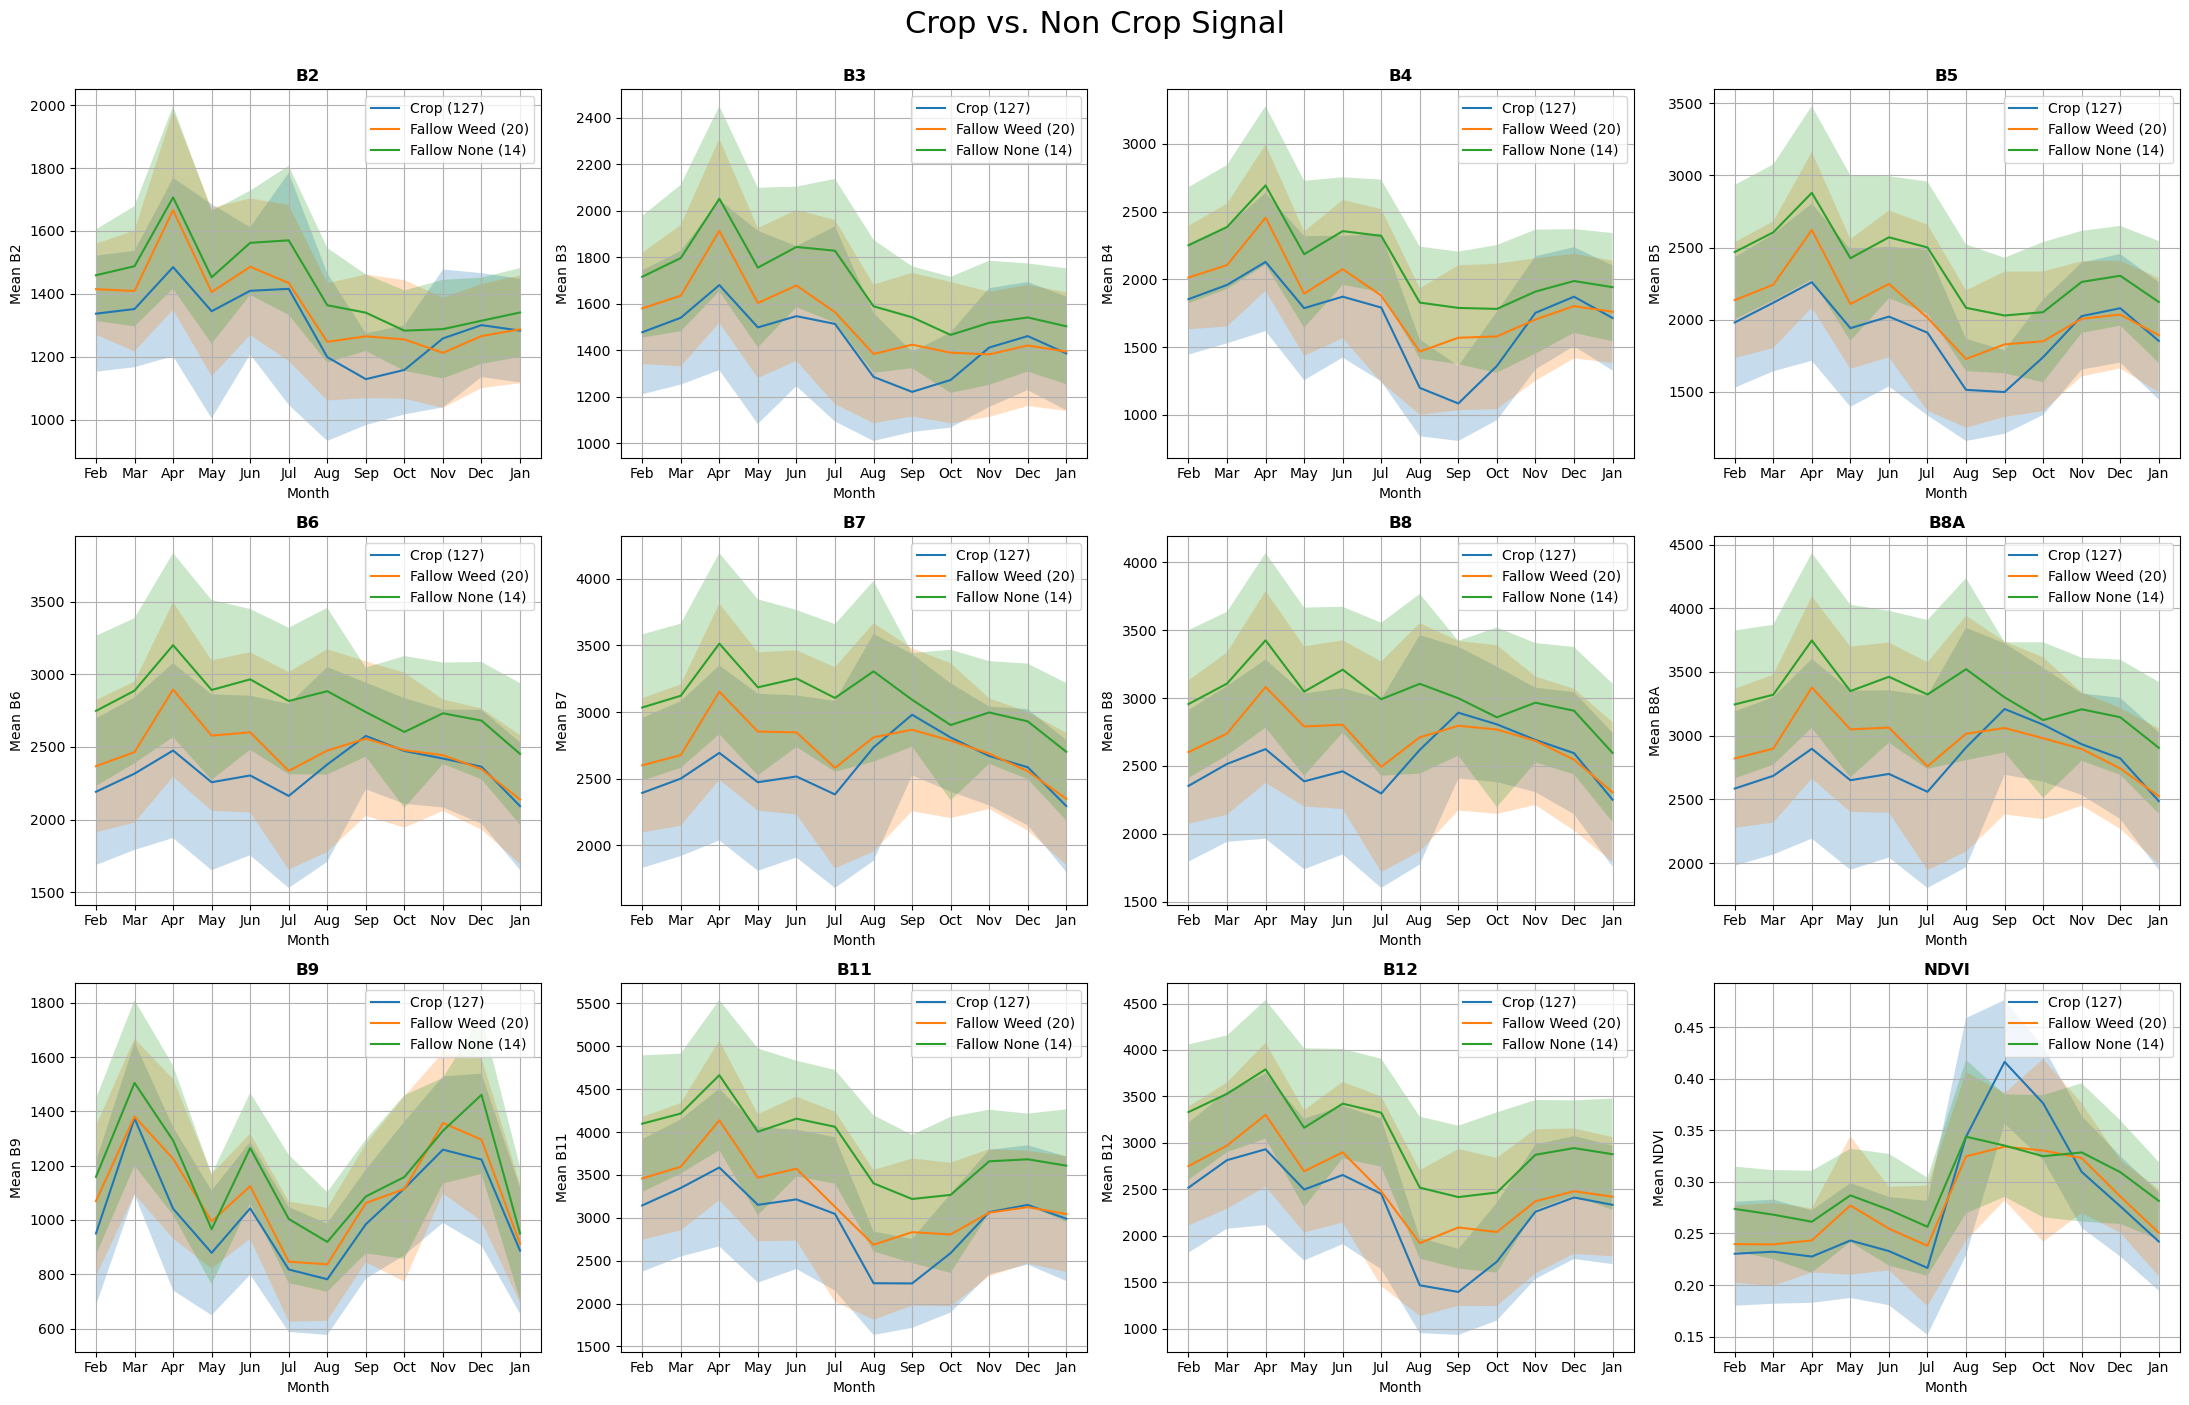

In [5]:
tu.plot_actuals(gdf)

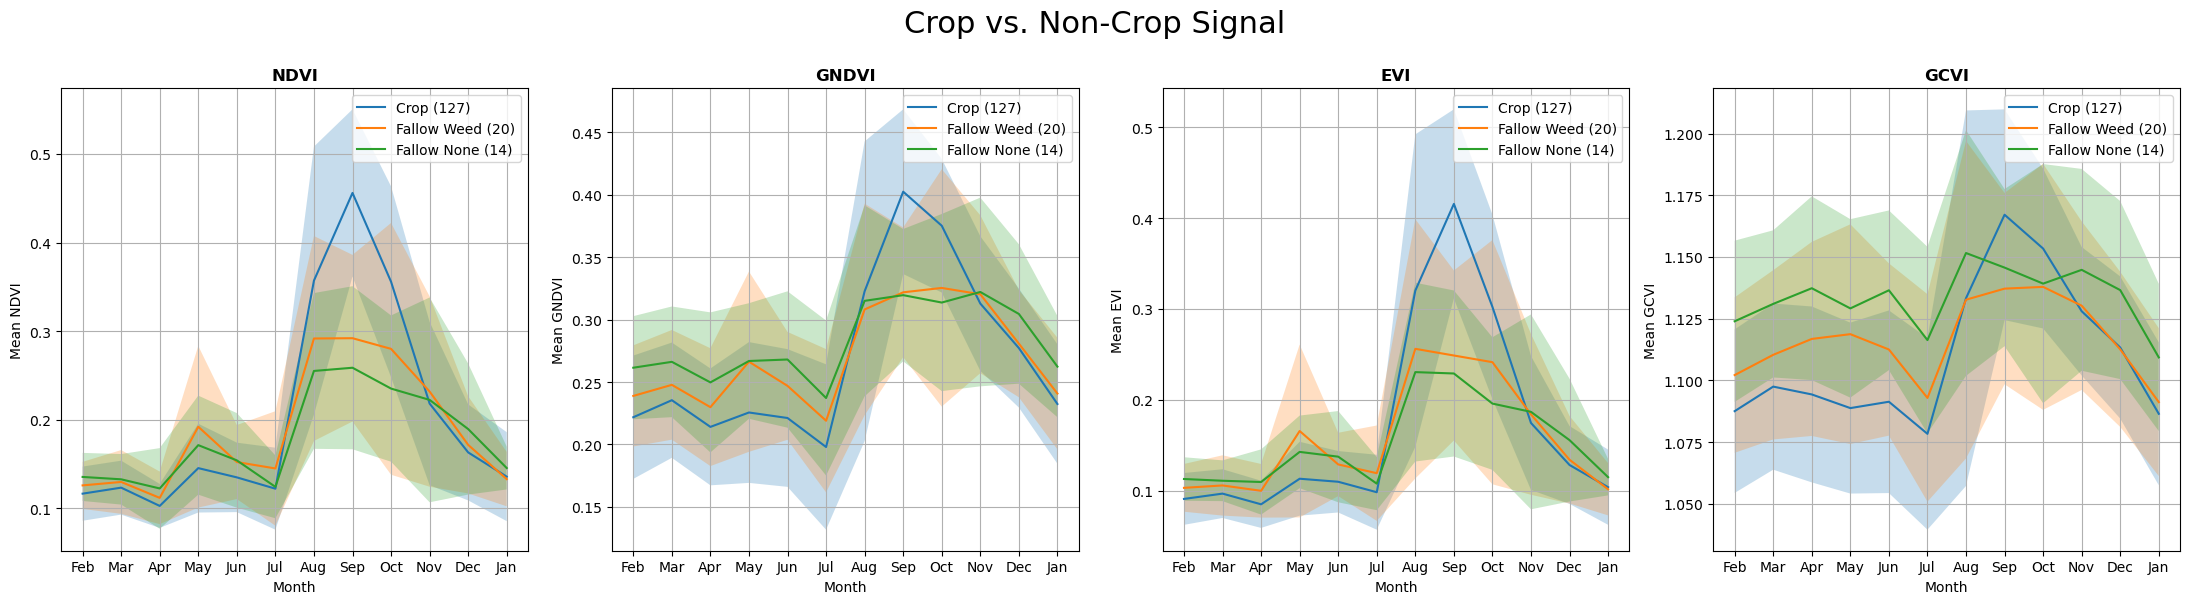

In [6]:
tu.plot_indices(gdf)

#### 2. Ground Truth Evaluation (Default)

In [7]:
comparison = tu.compare_gdf_and_map(gdf, map_array.squeeze(), map_meta, 0.50)
tu.print_report(comparison)

              precision    recall  f1-score   support

           0       0.25      0.12      0.16        34
           1       0.79      0.91      0.85       127

    accuracy                           0.74       161
   macro avg       0.52      0.51      0.50       161
weighted avg       0.68      0.74      0.70       161



False Positive Rate 0.8824 - True Positive Rate 0.9055


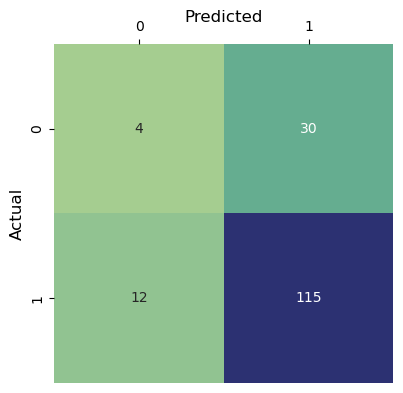

In [8]:
plot_confusion_matrix(comparison)

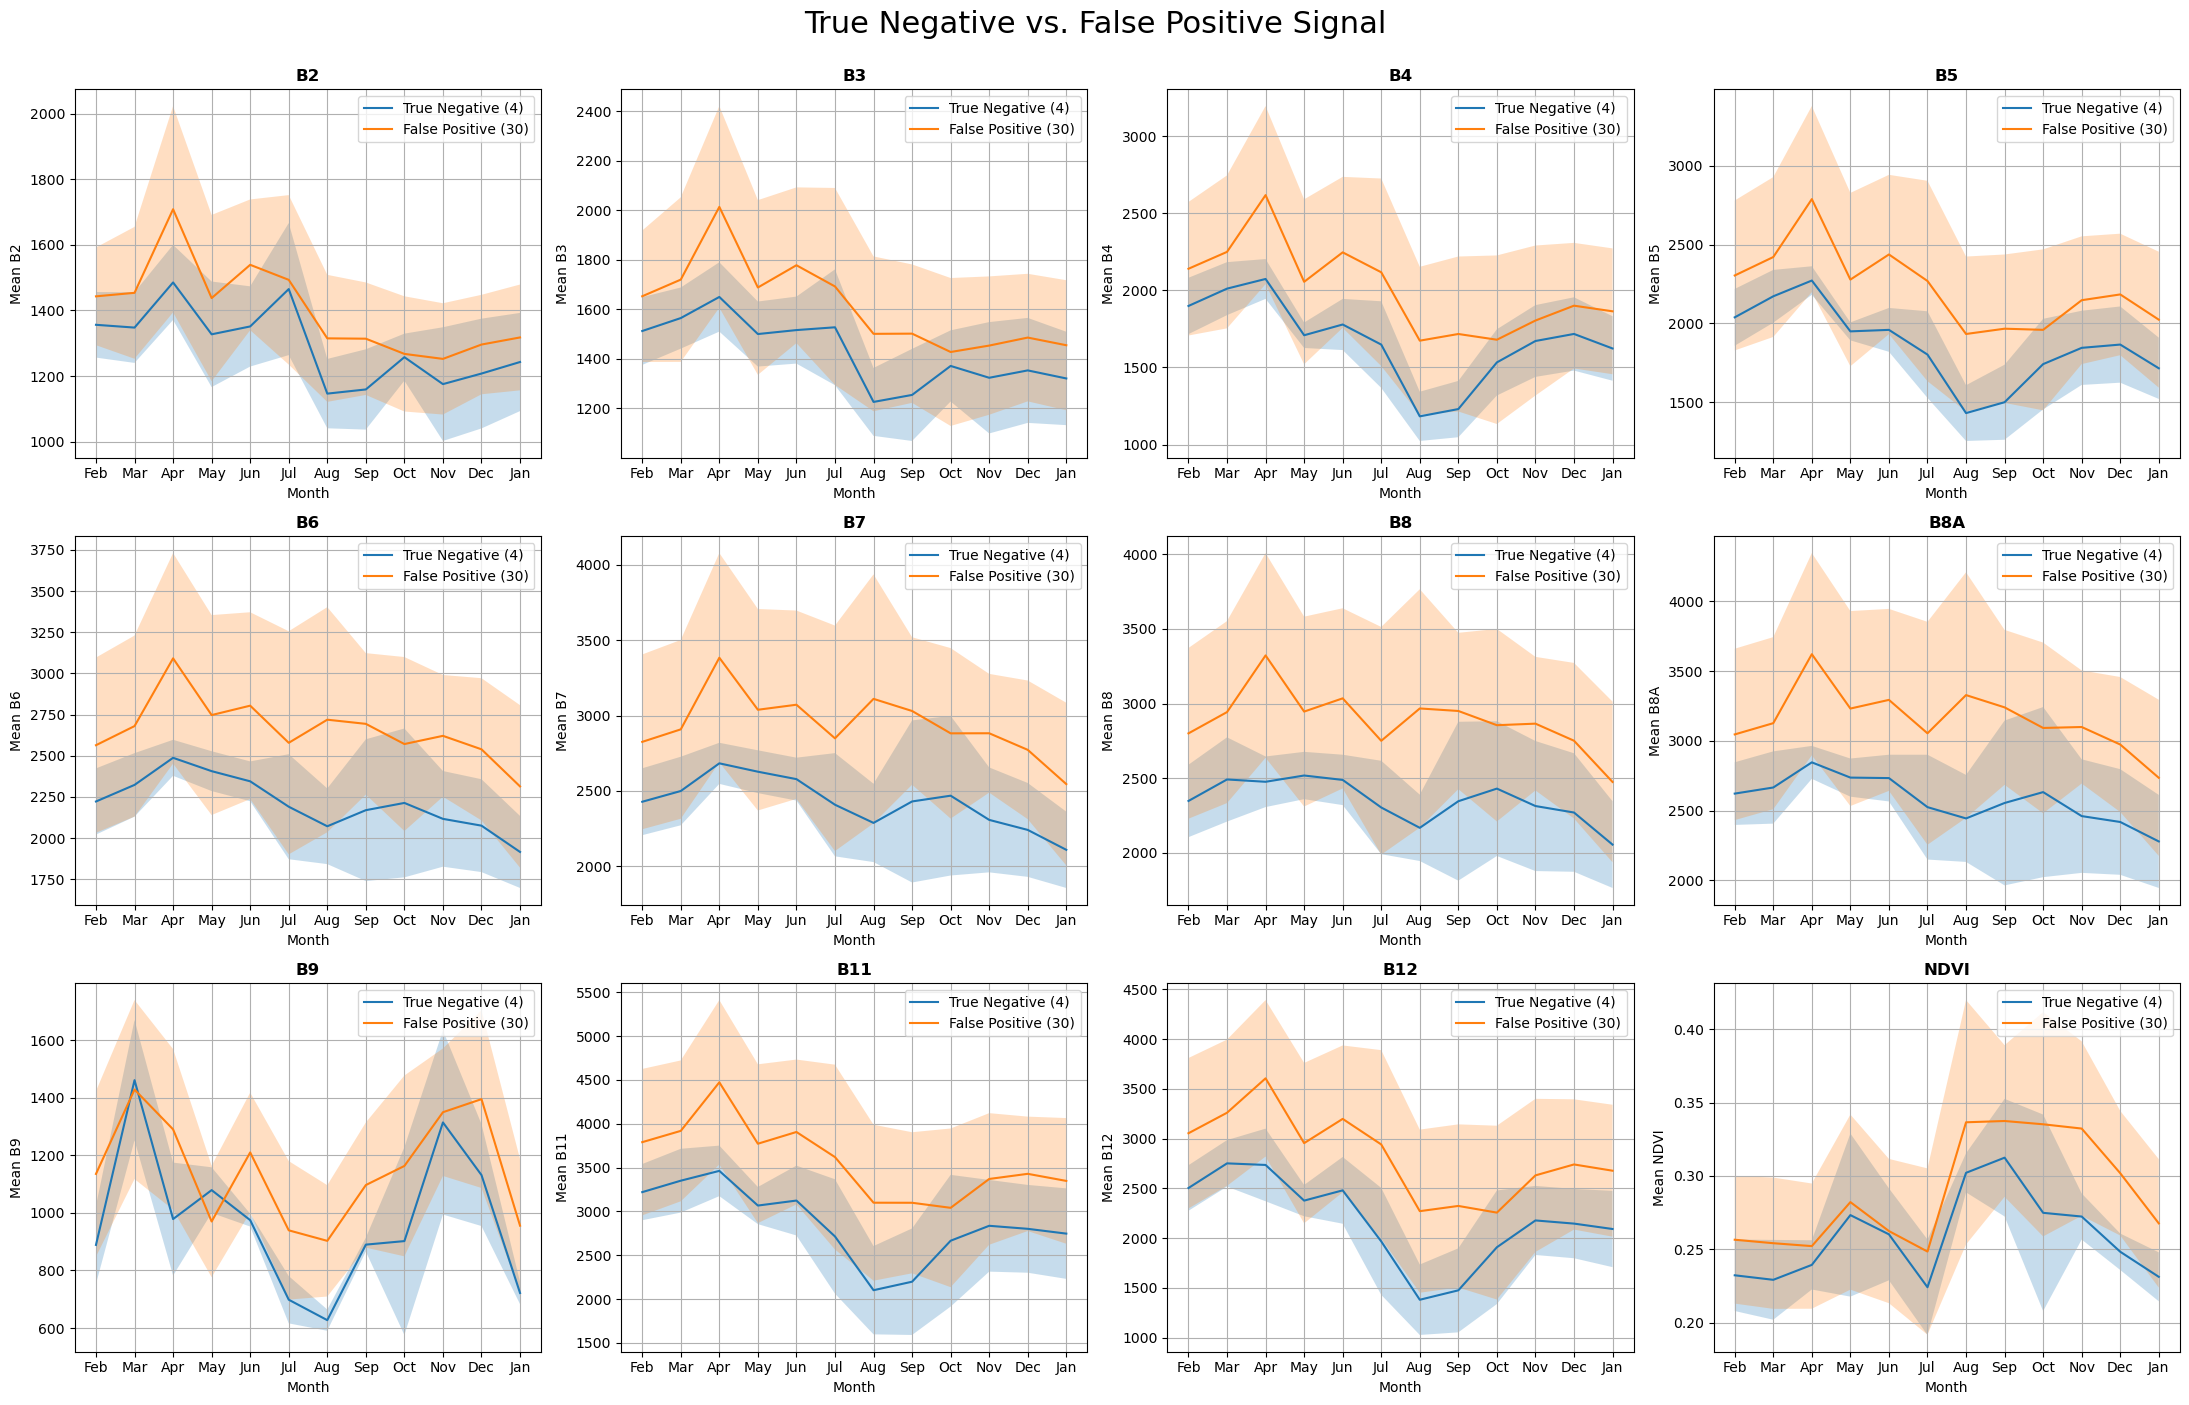

In [9]:
tu.plot_tn_fp(comparison)

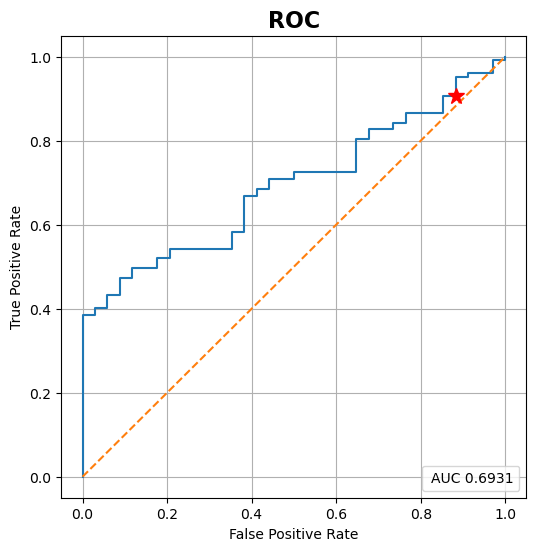

In [10]:
tu.plot_roc(comparison, 0.50) # 0.80

In [11]:
negatives = comparison[comparison.actual == 0]

In [12]:
# True negatives
negatives[negatives.prediction == negatives.actual].crop.value_counts() # All "fallow with weeds or grass"

crop
Fallow with weeds or grass    4
Name: count, dtype: int64

In [13]:
# False positives
negatives[negatives.prediction != negatives.actual].crop.value_counts() 

crop
Fallow with weeds or grass       16
Fallow (no vegetation at all)    14
Name: count, dtype: int64

In [14]:
positives = comparison[comparison.actual == 1]

In [15]:
# True positives
positives[positives.prediction == positives.actual].crop.value_counts()

crop
Other cereals (wheat, barley, millet)    57
Tef                                      31
Oil crops (Flax, niger seed)              9
Maize                                     7
Legumes (beans, peas)                     5
Sorghum                                   4
Potato                                    2
Name: count, dtype: int64

In [16]:
# False negatives
positives[positives.prediction != positives.actual].crop.value_counts()

crop
Other cereals (wheat, barley, millet)    5
Oil crops (Flax, niger seed)             3
Tef                                      2
Sorghum                                  1
Legumes (beans, peas)                    1
Name: count, dtype: int64

#### 3. Adjusting Probability-Binarizing Threshold

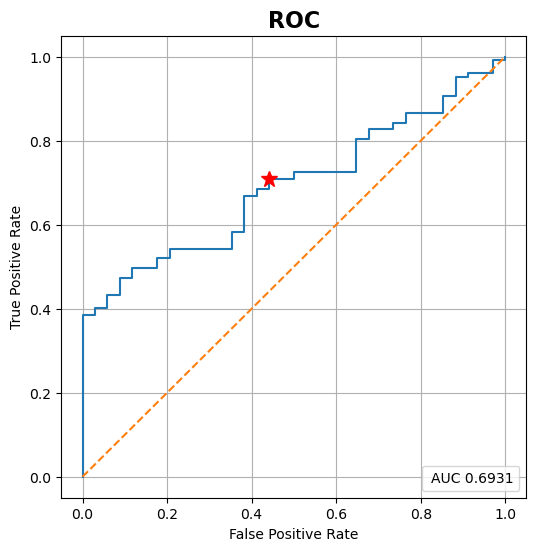

In [17]:
# Threshold value of '0.80' looks slightly more optimal 
tu.plot_roc(comparison, 0.80)

In [18]:
adj_comparison = tu.compare_gdf_and_map(gdf, map_array.squeeze(), map_meta, 0.80)
tu.print_report(adj_comparison)

              precision    recall  f1-score   support

           0       0.33      0.56      0.42        34
           1       0.86      0.70      0.77       127

    accuracy                           0.67       161
   macro avg       0.59      0.63      0.59       161
weighted avg       0.75      0.67      0.70       161



False Positive Rate 0.4412 - True Positive Rate 0.7008


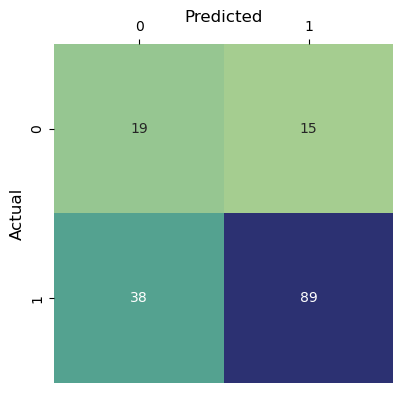

In [19]:
plot_confusion_matrix(adj_comparison)